In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person = 70 , resize= 0.4)

images = lfw_people.images
images.shape
target_names=lfw_people.target_names
target_names.shape

X = lfw_people.data
y = lfw_people.target

Text(0.5, 1.0, 'Colin Powell')

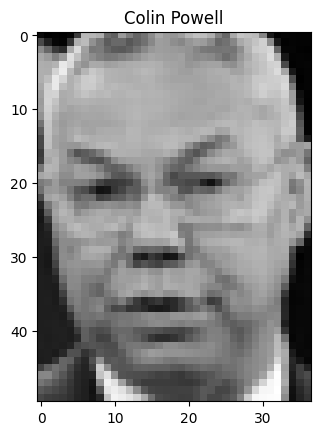

In [3]:
plt.imshow (images[3], cmap='gray')
plt.title(target_names[lfw_people.target[3]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.25, 
                                                    random_state=1984)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=250).fit(X_train)

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
clf = SVC(kernel='rbf', class_weight ='balanced')


In [10]:
#fitting and scorring the pca transformed data
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca,y_test)

0.7608695652173914

In [11]:
#clf.fit(X_train, y_train)
#clf.score(X_test,y_test)

In [12]:
y_pred_pca = clf.predict(X_test_pca)

In [13]:

cm = confusion_matrix(y_test,y_pred_pca, labels=range(len(target_names)) )

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = target_names)

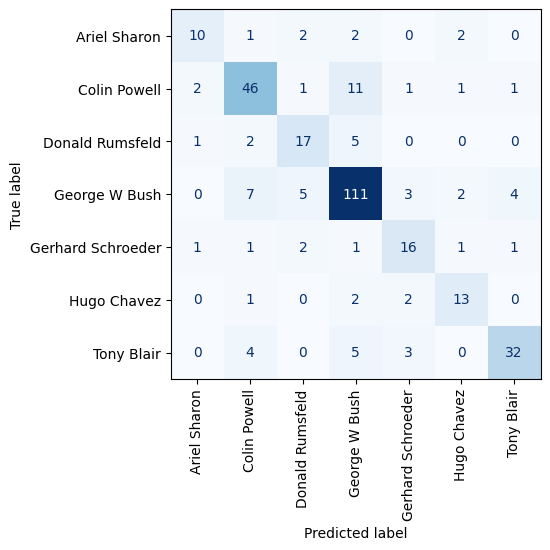

In [15]:
display.plot(cmap = 'Blues' , colorbar = False, xticks_rotation = "vertical")

In [16]:
print(classification_report(y_test,y_pred_pca, target_names = target_names ))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.59      0.65        17
     Colin Powell       0.74      0.73      0.74        63
  Donald Rumsfeld       0.63      0.68      0.65        25
    George W Bush       0.81      0.84      0.83       132
Gerhard Schroeder       0.64      0.70      0.67        23
      Hugo Chavez       0.68      0.72      0.70        18
       Tony Blair       0.84      0.73      0.78        44

         accuracy                           0.76       322
        macro avg       0.72      0.71      0.72       322
     weighted avg       0.76      0.76      0.76       322

